In [1]:
import pandas as pd
import csv
import sys
import os
import math
import numpy as np
import sklearn
n_clusters=3#number of clusters
n=0.1#percentage of links picked

In [2]:
os.getcwd()

'D:\\BISTRO\\BISTRO-TPE_optim\\BISTRO-Optimization-Library\\per_mile'

In [3]:
# linkstates=pd.read_csv('../fixed_data/30.events.csv')
# network=pd.read_csv('../fixed_data/network.csv')
linkstates=pd.read_csv('../fixed_data/30.events_sifaux_baseline/output.csv')
network=pd.read_csv('../fixed_data/30.events_sifaux_baseline/network.csv')
display(linkstates)
display(network)

,Unnamed: 0,mode,currentTourMode,person,expectedMaximumUtility,availableAlternatives,location,personalVehicleAvailable,length,tourIndex,...,parkingTaz,chargingType,pricingModel,parkingType,locationY,locationX,price,fuel,duration,departTime
0,0,NaN,NaN,rideHailAgent-700-2015001219743-1118449,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,NaN,rideHailAgent-600-2014000987574-081438,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,NaN,NaN,rideHailAgent-1803-2015001491257-0123661,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,NaN,NaN,rideHailAgent-1101-2016001157571-1149879,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,NaN,NaN,rideHailAgent-1803-2014001362907-090303,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401065,401065,walk,NaN,NaN,NaN,NaN,NaN,NaN,8232.445932,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
401066,401066,NaN,NaN,1108-2014001079600-084245,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
401067,401067,NaN,NaN,1108-2013000377800-139240,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
401068,401068,NaN,NaN,1108-2014001079600-084073,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,linkId,linkLength,linkFreeSpeed,linkCapacity,numberOfLanes,linkModes,attributeOrigId,attributeOrigType,fromNodeId,toNodeId,fromLocationX,fromLocationY,toLocationX,toLocationY
0,0,129.161,6.172840,2300.0,1.0,car;walk;bike,45868.0,primary,0,1,683519.154791,4.820101e+06,683392.999328,4.820072e+06
1,1,129.161,6.172840,2300.0,1.0,car;walk;bike,45868.0,primary,1,0,683392.999328,4.820072e+06,683519.154791,4.820101e+06
2,10,89.613,6.172840,2300.0,1.0,car;walk;bike,45878.0,primary,10,11,685929.619785,4.822046e+06,685931.063095,4.822136e+06
3,100,132.887,6.172840,2300.0,1.0,car;walk;bike,45968.0,primary,99,100,679274.491430,4.823873e+06,679260.086142,4.823740e+06
4,1000,324.518,3.472222,1050.0,0.5,car;walk;bike,46868.0,tertiary,817,818,683942.666081,4.828978e+06,684268.190766,4.828984e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5807,995,256.655,4.629630,2200.0,1.0,car;walk;bike,46862.0,secondary,813,812,687449.621183,4.818981e+06,687192.205764,4.818974e+06
5808,996,33.720,6.172840,3450.0,1.5,car;walk;bike,46864.0,primary,814,129,679333.695656,4.823603e+06,679367.509776,4.823604e+06
5809,997,33.720,6.172840,3450.0,1.5,car;walk;bike,46864.0,primary,129,814,679367.509776,4.823604e+06,679333.695656,4.823603e+06
5810,998,388.146,3.472222,1050.0,0.5,car;walk;bike,46866.0,tertiary,815,816,680669.916105,4.830878e+06,680682.005701,4.830490e+06


In [4]:
display(linkstates.columns)
linkstates=linkstates[(linkstates['type']=='PathTraversal')&((linkstates['mode']=='car')|(linkstates['mode']=='bus'))][['mode','vehicleType','links']]
display(linkstates)

Index(['Unnamed: 0', 'mode', 'currentTourMode', 'person',
       'expectedMaximumUtility', 'availableAlternatives', 'location',
       'personalVehicleAvailable', 'length', 'tourIndex', 'time', 'type',
       'driver', 'vehicle', 'arrivalTime', 'departureTime', 'linkTravelTime',
       'secondaryFuel', 'secondaryFuelType', 'primaryFuelType',
       'seatingCapacity', 'tollPaid', 'secondaryFuelLevel', 'primaryFuelLevel',
       'endY', 'endX', 'startY', 'startX', 'capacity', 'vehicleType', 'links',
       'numPassengers', 'primaryFuel', 'link', 'facility', 'actType',
       'parkingTaz', 'chargingType', 'pricingModel', 'parkingType',
       'locationY', 'locationX', 'price', 'fuel', 'duration', 'departTime'],
      dtype='object')

,mode,vehicleType,links
2610,bus,BUS-DEFAULT,"659,3949,2847,1489,4513,2167,1878"
2611,bus,BUS-DEFAULT,"1879,712,4812"
2612,bus,BUS-DEFAULT,"4812,4676,1313,1130,4808"
2613,bus,BUS-DEFAULT,"4808,4680,4805,1537,902,4684"
2614,bus,BUS-DEFAULT,"4684,2728,4800,4688"
...,...,...,...
401014,car,CAR-TYPE-DEFAULT,"2382,2382,826,5582,5442,3311,2890,982,5452,187..."
401015,car,CAR-TYPE-DEFAULT,"2973,272"
401022,car,CAR-TYPE-DEFAULT,"2290,2142"
401029,car,CAR-TYPE-DEFAULT,"202,2678,1134,3916,743,3813,2860,3462,4186,167..."


In [5]:
links=linkstates['links']
counter={}
for link in links:
    link=link.split(',')
    for l in link:
        if l not in counter:
            counter[l]=1
        else:
            counter[l]+=1
display(counter)

{'659': 464,
 '3949': 394,
 '2847': 399,
 '1489': 363,
 '4513': 270,
 '2167': 273,
 '1878': 275,
 '1879': 232,
 '712': 288,
 '4812': 285,
 '4676': 287,
 '1313': 261,
 '1130': 273,
 '4808': 300,
 '4680': 238,
 '4805': 314,
 '1537': 311,
 '902': 324,
 '4684': 375,
 '2728': 327,
 '4800': 338,
 '4688': 370,
 '2560': 437,
 '4796': 543,
 '4693': 463,
 '1505': 597,
 '4791': 533,
 '3103': 478,
 '4697': 711,
 '4701': 646,
 '3395': 653,
 '2330': 603,
 '4786': 657,
 '2204': 590,
 '4782': 623,
 '4704': 623,
 '3489': 553,
 '890': 704,
 '4708': 808,
 '4779': 610,
 '2803': 682,
 '4713': 464,
 '2307': 414,
 '1234': 479,
 '4774': 563,
 '4716': 252,
 '2410': 286,
 '4770': 335,
 '4720': 275,
 '3790': 636,
 '4766': 788,
 '4724': 652,
 '4763': 673,
 '4729': 775,
 '2255': 756,
 '518': 1053,
 '4758': 1044,
 '4732': 1067,
 '2829': 1026,
 '2316': 1058,
 '4752': 1141,
 '3219': 386,
 '320': 734,
 '204': 110,
 '4373': 341,
 '2045': 337,
 '4736': 691,
 '4748': 666,
 '1988': 647,
 '4744': 633,
 '4740': 708,
 '2044'

In [6]:
link_all_group=pd.DataFrame.from_dict(counter, orient='index')
link_all_group.reset_index(inplace=True)
link_all_group=link_all_group.rename(columns={'index': "link",0:'volume'})
link_all_group['link']=link_all_group['link'].astype('int')
display(link_all_group)
display(network)
display(type(link_all_group['link'][0]),type(network['linkId'][0]))

,link,volume
0,659,464
1,3949,394
2,2847,399
3,1489,363
4,4513,270
...,...,...
4285,2578,1
4286,209,1
4287,951,1
4288,5565,1


,linkId,linkLength,linkFreeSpeed,linkCapacity,numberOfLanes,linkModes,attributeOrigId,attributeOrigType,fromNodeId,toNodeId,fromLocationX,fromLocationY,toLocationX,toLocationY
0,0,129.161,6.172840,2300.0,1.0,car;walk;bike,45868.0,primary,0,1,683519.154791,4.820101e+06,683392.999328,4.820072e+06
1,1,129.161,6.172840,2300.0,1.0,car;walk;bike,45868.0,primary,1,0,683392.999328,4.820072e+06,683519.154791,4.820101e+06
2,10,89.613,6.172840,2300.0,1.0,car;walk;bike,45878.0,primary,10,11,685929.619785,4.822046e+06,685931.063095,4.822136e+06
3,100,132.887,6.172840,2300.0,1.0,car;walk;bike,45968.0,primary,99,100,679274.491430,4.823873e+06,679260.086142,4.823740e+06
4,1000,324.518,3.472222,1050.0,0.5,car;walk;bike,46868.0,tertiary,817,818,683942.666081,4.828978e+06,684268.190766,4.828984e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5807,995,256.655,4.629630,2200.0,1.0,car;walk;bike,46862.0,secondary,813,812,687449.621183,4.818981e+06,687192.205764,4.818974e+06
5808,996,33.720,6.172840,3450.0,1.5,car;walk;bike,46864.0,primary,814,129,679333.695656,4.823603e+06,679367.509776,4.823604e+06
5809,997,33.720,6.172840,3450.0,1.5,car;walk;bike,46864.0,primary,129,814,679367.509776,4.823604e+06,679333.695656,4.823603e+06
5810,998,388.146,3.472222,1050.0,0.5,car;walk;bike,46866.0,tertiary,815,816,680669.916105,4.830878e+06,680682.005701,4.830490e+06


numpy.int32

numpy.int64

In [7]:
link_all_group=pd.merge(link_all_group, network, how='inner', left_on='link',right_on='linkId')
display(link_all_group)

,link,volume,linkId,linkLength,linkFreeSpeed,linkCapacity,numberOfLanes,linkModes,attributeOrigId,attributeOrigType,fromNodeId,toNodeId,fromLocationX,fromLocationY,toLocationX,toLocationY
0,659,464,659,46.155,6.172840,1150.0,0.5,car;walk;bike,46526.0,primary,568,567,683754.015263,4.823818e+06,683707.697247,4.823817e+06
1,3949,394,3949,65.449,6.172840,1150.0,0.5,car;walk;bike,49816.0,primary,567,644,683707.697247,4.823817e+06,683642.055479,4.823815e+06
2,2847,399,2847,119.912,6.172840,3450.0,1.5,car;walk;bike,48714.0,primary,644,1105,683642.055479,4.823815e+06,683521.779292,4.823812e+06
3,1489,363,1489,120.636,6.172840,3450.0,1.5,car;walk;bike,47356.0,primary,1105,192,683521.779292,4.823812e+06,683400.798789,4.823809e+06
4,4513,270,4513,16.601,6.172840,3450.0,1.5,car;walk;bike,48034.0,primary,192,1403,683400.798789,4.823809e+06,683384.182217,4.823808e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4285,2578,1,2578,10.478,4.629630,2200.0,1.0,car;walk;bike,48446.0,secondary,216,751,683677.275231,4.830186e+06,683687.785060,4.830187e+06
4286,209,1,209,116.694,3.472222,1050.0,0.5,car;walk;bike,46076.0,tertiary,197,196,682973.097573,4.825986e+06,682860.020169,4.825955e+06
4287,951,1,951,121.955,3.472222,1050.0,0.5,car;walk;bike,46818.0,tertiary,196,630,682860.020169,4.825955e+06,682742.874374,4.825920e+06
4288,5565,1,5565,5.375,2.777778,300.0,1.0,car;walk;bike,NaN,NaN,1800,2266,678814.236891,4.823587e+06,678814.388101,4.823582e+06


In [8]:
link_all_group=link_all_group.loc[:,['link','linkLength','volume','linkCapacity']].groupby('link',as_index=False)
size=link_all_group.size().loc[:,'size']
# display(size)
link_all=link_all_group.agg({'volume':'sum','linkLength':'mean','linkCapacity':'mean'})
# display(link_all.loc[:,'volume'])
# display(link_all.loc[:,['capacity']])
link_all.loc[:,'crowding']=link_all.loc[:,'volume']/(link_all.loc[:,'linkCapacity']*size[:])
link_all.sort_values(by='crowding',ascending=False,inplace=True)
display(link_all)

,link,volume,linkLength,linkCapacity,crowding
3349,4248,859,268.288,1050.0,0.818095
3360,4261,850,131.191,1050.0,0.809524
4181,5629,752,166.956,1050.0,0.716190
3359,4260,735,131.191,1050.0,0.700000
1971,2480,777,245.555,1150.0,0.675652
...,...,...,...,...,...
3209,4076,1,220.111,2300.0,0.000435
45,55,1,12.958,2300.0,0.000435
772,962,1,76.785,2500.0,0.000400
2604,3294,1,98.583,2500.0,0.000400


In [9]:
linkstates_position=pd.merge(link_all, network, how='inner', left_on='link',right_on='linkId')
display(linkstates_position)
linkstates_position=linkstates_position.loc[:,['link','volume','linkCapacity_x','crowding','fromLocationX','fromLocationY','toLocationX','toLocationY']]
display(linkstates_position)

,link,volume,linkLength_x,linkCapacity_x,crowding,linkId,linkLength_y,linkFreeSpeed,linkCapacity_y,numberOfLanes,linkModes,attributeOrigId,attributeOrigType,fromNodeId,toNodeId,fromLocationX,fromLocationY,toLocationX,toLocationY
0,4248,859,268.288,1050.0,0.818095,4248,268.288,3.472222,1050.0,0.5,car;walk;bike,50116.0,tertiary,955,1851,678586.927899,4.819147e+06,678577.987343,4.819415e+06
1,4261,850,131.191,1050.0,0.809524,4261,131.191,3.472222,1050.0,0.5,car;walk;bike,50128.0,tertiary,1687,252,678571.831290,4.819599e+06,678697.044727,4.819559e+06
2,5629,752,166.956,1050.0,0.716190,5629,166.956,3.472222,1050.0,0.5,car;walk;bike,49152.0,tertiary,1110,1718,678547.716325,4.820357e+06,678553.084542,4.820190e+06
3,4260,735,131.191,1050.0,0.700000,4260,131.191,3.472222,1050.0,0.5,car;walk;bike,50128.0,tertiary,252,1687,678697.044727,4.819559e+06,678571.831290,4.819599e+06
4,2480,777,245.555,1150.0,0.675652,2480,245.555,6.172840,1150.0,0.5,car;walk;bike,48348.0,primary,369,0,683752.875302,4.820179e+06,683519.154791,4.820101e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4285,4076,1,220.111,2300.0,0.000435,4076,220.111,6.172840,2300.0,1.0,car;walk;bike,49944.0,primary,55,1223,683394.965796,4.828042e+06,683388.102424,4.828262e+06
4286,55,1,12.958,2300.0,0.000435,55,12.958,6.172840,2300.0,1.0,car;walk;bike,45922.0,primary,55,54,683394.965796,4.828042e+06,683395.344463,4.828029e+06
4287,962,1,76.785,2500.0,0.000400,962,76.785,3.858025,2500.0,1.0,car;bike,46830.0,motorway,790,3,681977.295583,4.825226e+06,681952.739437,4.825299e+06
4288,3294,1,98.583,2500.0,0.000400,3294,98.583,3.858025,2500.0,1.0,car;bike,49162.0,motorway,1046,362,681127.223963,4.825896e+06,681224.906511,4.825911e+06


,link,volume,linkCapacity_x,crowding,fromLocationX,fromLocationY,toLocationX,toLocationY
0,4248,859,1050.0,0.818095,678586.927899,4.819147e+06,678577.987343,4.819415e+06
1,4261,850,1050.0,0.809524,678571.831290,4.819599e+06,678697.044727,4.819559e+06
2,5629,752,1050.0,0.716190,678547.716325,4.820357e+06,678553.084542,4.820190e+06
3,4260,735,1050.0,0.700000,678697.044727,4.819559e+06,678571.831290,4.819599e+06
4,2480,777,1150.0,0.675652,683752.875302,4.820179e+06,683519.154791,4.820101e+06
...,...,...,...,...,...,...,...,...
4285,4076,1,2300.0,0.000435,683394.965796,4.828042e+06,683388.102424,4.828262e+06
4286,55,1,2300.0,0.000435,683394.965796,4.828042e+06,683395.344463,4.828029e+06
4287,962,1,2500.0,0.000400,681977.295583,4.825226e+06,681952.739437,4.825299e+06
4288,3294,1,2500.0,0.000400,681127.223963,4.825896e+06,681224.906511,4.825911e+06


In [10]:
#take n*all most occupied links and cluster  
pickedlinkstats=linkstates_position.iloc[:math.ceil(linkstates_position.shape[0]*n),:]
display(linkstates_position.shape)
display(pickedlinkstats.shape)
display(pickedlinkstats)

(4290, 8)

(429, 8)

,link,volume,linkCapacity_x,crowding,fromLocationX,fromLocationY,toLocationX,toLocationY
0,4248,859,1050.0,0.818095,678586.927899,4.819147e+06,678577.987343,4.819415e+06
1,4261,850,1050.0,0.809524,678571.831290,4.819599e+06,678697.044727,4.819559e+06
2,5629,752,1050.0,0.716190,678547.716325,4.820357e+06,678553.084542,4.820190e+06
3,4260,735,1050.0,0.700000,678697.044727,4.819559e+06,678571.831290,4.819599e+06
4,2480,777,1150.0,0.675652,683752.875302,4.820179e+06,683519.154791,4.820101e+06
...,...,...,...,...,...,...,...,...
424,3112,502,2300.0,0.218261,679281.368069,4.823543e+06,679289.360093,4.823360e+06
425,194,480,2200.0,0.218182,678520.331884,4.821576e+06,678520.633967,4.821564e+06
426,4244,229,1050.0,0.218095,683753.018331,4.821310e+06,684157.643592,4.821321e+06
427,2662,500,2300.0,0.217391,683396.368809,4.819795e+06,683397.283359,4.819771e+06


In [11]:
#convert links to representing points of links
pickedlinkstats.loc[:,'x']=(pickedlinkstats.loc[:,'fromLocationX']+pickedlinkstats.loc[:,'toLocationX'])/2
pickedlinkstats.loc[:,'y']=(pickedlinkstats.loc[:,'fromLocationY']+pickedlinkstats.loc[:,'toLocationY'])/2
data_tocluster=pickedlinkstats.loc[:,['x','y']]
display(data_tocluster)

D:\Conda_envs\bistroenvs\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
D:\Conda_envs\bistroenvs\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,x,y
0,678582.457621,4.819281e+06
1,678634.438008,4.819579e+06
2,678550.400433,4.820273e+06
3,678634.438008,4.819579e+06
4,683636.015046,4.820140e+06
...,...,...
424,679285.364081,4.823451e+06
425,678520.482926,4.821570e+06
426,683955.330961,4.821315e+06
427,683396.826084,4.819783e+06


In [12]:
#cluster the data
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters, random_state=0).fit(data_tocluster)

In [13]:
#https://stackoverflow.com/questions/36195457/python-sklearn-kmeans-how-to-get-the-samples-points-in-each-clusters
cluster_map = pd.DataFrame()
cluster_map['index'] = data_tocluster.index.values
cluster_map['cluster num'] = kmeans.labels_
display(cluster_map)

,index,cluster num
0,0,1
1,1,1
2,2,1
3,3,1
4,4,2
...,...,...
424,424,1
425,425,1
426,426,2
427,427,2


In [14]:
#https://stackoverflow.com/questions/36195457/python-sklearn-kmeans-how-to-get-the-samples-points-in-each-clusters
def ClusterIndicesNumpy(clustNum, labels_array): #numpy 
    return np.where(labels_array == clustNum)[0]
# ClusterIndicesNumpy(2,kmeans.labels_)
# data_tocluster.iloc[ClusterIndicesNumpy(0,kmeans.labels_),:]

In [15]:
#filter by cluster and get convex hull
clusters=[]
hulls=[]
from scipy.spatial import ConvexHull, convex_hull_plot_2d
for i in range(n_clusters):
    clusters.append(data_tocluster.iloc[ClusterIndicesNumpy(i,kmeans.labels_),:])
#     display(thiscluster)
#     display(clusters[i].values)
    hulls.append(ConvexHull(clusters[i].values))
#     display(hull)

'r '

[2710.580216582052, 3908.287645381143, 2900.1596664501208]

'adjusted r '

[1836.7568578298713, 1961.7685119458943, 1836.7568578298713]

'centriod'

[[685599.6791671999, 4823419.446916052],
 [679823.2008472716, 4820975.419121696],
 [683685.3619621331, 4820284.149058188]]

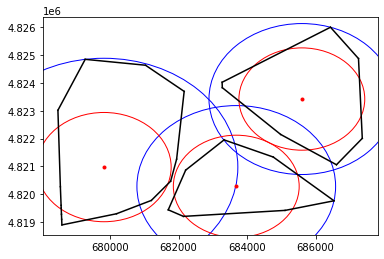

In [16]:
#hulls plotting
import matplotlib.pyplot as plt
circle_r=[]
circle_centroid=[]
for i,hull in enumerate(hulls):
    r_now=0
    centroid = np.mean(clusters[i].values[hull.vertices, :], axis=0)
    circle_centroid.append(list(centroid))
#     display(centroid)
    plt.plot(centroid[0],centroid[1], marker='o', markersize=3, color="red")
    for simplex in hull.simplices:
#         display(simplex)
#         display(clusters[i].values[simplex, 0],clusters[i].values[simplex, 1])
#         display(np.sqrt((centroid[0]-clusters[i].values[simplex, 0])**2+(centroid[1]-clusters[i].values[simplex, 1])**2))
#         display(centroid[0]-clusters[i].values[simplex, 0][0])
#         display(centroid[1])
#         display(clusters[i].values[simplex, 0][1])
        r_now=max(r_now,np.sqrt((centroid[0]-clusters[i].values[simplex, 0][0])**2+(centroid[1]-clusters[i].values[simplex, 1][0])**2))
        r_now=max(r_now,np.sqrt((centroid[0]-clusters[i].values[simplex, 0][1])**2+(centroid[1]-clusters[i].values[simplex, 1][1])**2))
#         display(r_now)
        plt.plot(clusters[i].values[simplex, 0], clusters[i].values[simplex, 1], 'k-')
#     display(hull.vertices)
    circle=plt.Circle((centroid[0], centroid[1]), r_now, color='b',fill=False)
#     display(circle)
    plt.gcf().gca().add_artist(circle)
    circle_r.append(r_now)
#     display('next')
adjusted_circle_r=circle_r.copy()
display('r ', circle_r)
for i in range(len(circle_centroid)):
    for j in range(i+1,len(circle_centroid)):
        adjust_r=np.sqrt((circle_centroid[i][0]-circle_centroid[j][0])**2+(circle_centroid[i][1]-circle_centroid[j][1])**2)/2
#         print(i,j,adjust_r)
        adjusted_circle_r[i]=min(adjust_r,adjusted_circle_r[i])
        adjusted_circle_r[j]=min(adjust_r,adjusted_circle_r[j])
display('adjusted r ', adjusted_circle_r)
for i in range(len(circle_centroid)):
    circle=plt.Circle((circle_centroid[i][0], circle_centroid[i][1]), adjusted_circle_r[i], color='r',fill=False)
    plt.gcf().gca().add_artist(circle)
# display(circle_r)
display('centriod')
display(circle_centroid)